In [31]:
from __future__ import division
import numpy as np
from sklearn import datasets
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

### standarize data of each column (feature)  
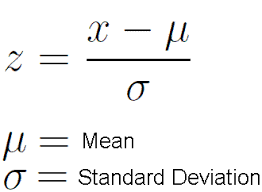       




In [5]:
def standardize(X):
    """ Standardize the dataset X """
    X_std = X
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    return X_std

## $\mbox{COV} = \frac{\sum_{i=1}^n (X_i - \bar{x})(Y_i - \bar{y})}{n-1} \, ,$

In [38]:
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

# $\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

In [40]:
def calculate_correlation_matrix(X, Y=None):
    """ Calculate the correlation matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

## $S = \sum\limits_{k=1}^n (\pmb x_k - \pmb m)\;(\pmb x_k - \pmb m)^T$

## $\pmb m = \frac{1}{n} \sum\limits_{k=1}^n \; \pmb x_k \text{   (mean vector)}$

In [ ]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and 
    maximizing the variance along each feature axis. This class is also used throughout
    the project to plot data.
    """
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the 
        constructor and return the transformed dataset """
        covariance_matrix = calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed


In [41]:
np.linalg.eig?